[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\carson\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Eros STX Sees Itself as a $1 Billion Business in 2022
Aug-18-20 01:08PM  
GRAPHIC-Big Tech drives S&P 500 to record high in coronavirus rally
12:45PM  
His fund has lost $21 billion this year  now hes warning investors could be in for even more turbulence this fall
12:31PM  
3 Future 10-Baggers to Watch
12:09PM  


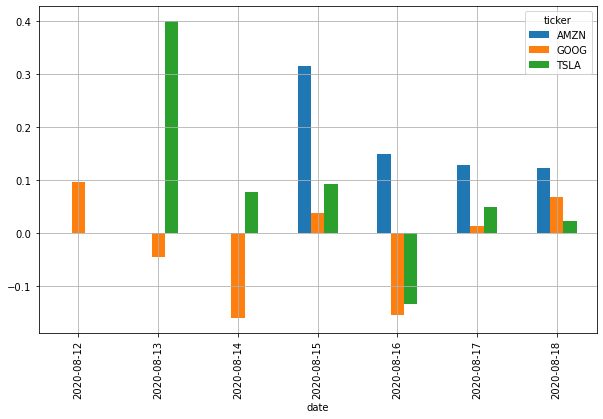

In [1]:
#https://towardsdatascience.com/sentiment-analysis-of-stocks-from-financial-news-using-python-82ebdcefb638
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

finwiz_url = 'https://finviz.com/quote.ashx?t='
#######
news_tables = {}
tickers = ['AMZN', 'TSLA', 'GOOG']

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table
#######    
    # Read one single day of headlines for 'AMZN' 
amzn = news_tables['AMZN']
# Get all the table rows tagged in HTML with <tr> into 'amzn_tr'
amzn_tr = amzn.findAll('tr')

for i, table_row in enumerate(amzn_tr):
    # Read the text of the element 'a' into 'link_text'
    a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    td_text = table_row.td.text
    # Print the contents of 'link_text' and 'data_text' 
    print(a_text)
    print(td_text)
    # Exit after printing 4 rows of data
    if i == 3:
        break

parsed_news = []
        
#######  

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news

#######  

# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date
savedDF = parsed_and_scored_news.head().to_html()         ############### The dataframe I include in my email
parsed_and_scored_news.head()

####### 
plt.rcParams['figure.figsize'] = [10, 6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()
plt.savefig('C:\\Users\\carson\\Documents\\Python_Scripts\\alpaca\\plot')



In [2]:
# Send an HTML email with an embedded image and a plain text message for
# email clients that don't want to display the HTML.
import smtplib, ssl
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.image import MIMEImage

################################################## Use Inputs
Commentary = 'This was a rocky week for markets as broad-based indices stumbled by more than 5% globally, with the S&amp;P 500 down a concerning 2.5%. Despite the volatility, AlgoA profited selling three positions it held going into this week ahead of the ensuing sell-off. The strategy delivered 2% better-than-benchmark returns this week for a $5,694 notional gain. Seen below, sentiment for the positions we held shifted markedly mid-week as the leading headline was focused on Coronavirus contagion in the EU and fiscal gridlock preventing the bloc from passing further stimulus measures.'
savedplot = 'C:\\Users\\carson\\Documents\\Python_Scripts\\alpaca\\plot.png'
htmltext='<p>Good morning,</p>' + Commentary + '<br><img src="cid:image1"><br><br>'+ savedDF + '</p><br>Best,<br>Carson West'
################################################## 

# Define these once; use them twice!
emailList = ['firstwestventures@gmail.com','cwestie27@gmail.com']
def performanceemail(emailList):
    for email in emailList:
        strFrom = 'firstwestventures@gmail.com'
        strTo = email

        # Create the root message and fill in the from, to, and subject headers
        msgRoot = MIMEMultipart('related')
        msgRoot['Subject'] = 'Algo Strategy Summary'
        msgRoot['From'] = strFrom
        msgRoot['To'] = strTo
        msgRoot.preamble = 'This is a multi-part message in MIME format.'

        # Encapsulate the plain and HTML versions of the message body in an
        # 'alternative' part, so message agents can decide which they want to display.
        msgAlternative = MIMEMultipart('alternative')
        msgRoot.attach(msgAlternative)

        msgText = MIMEText('This is the alternative plain text message.')
        msgAlternative.attach(msgText)

        # We reference the image in the IMG SRC attribute by the ID we give it below
        msgText = MIMEText(htmltext, 'html')

        msgAlternative.attach(msgText)

        # This example assumes the image is in the current directory
        fp = open(savedplot, 'rb')
        msgImage = MIMEImage(fp.read())
        fp.close()

        # Define the image's ID as referenced above
        msgImage.add_header('Content-ID', '<image1>')
        msgRoot.attach(msgImage)


        # Create secure connection with server and send email
        context = ssl.create_default_context()
        with smtplib.SMTP_SSL("smtp.gmail.com", 465, context=context) as server:
            server.login('firstwestventures@gmail.com', 'Knights11')
            server.sendmail(
                strFrom, strTo, msgRoot.as_string()
            )

In [4]:
emailList = ['firstwestventures@gmail.com','cwestie27@gmail.com']
performanceemail(emailList)

In [ ]:
##create a crossover function that returns a signal so that my next strategy i can just change that section. returns "buy signal" or "sell signal"